In [8]:
import torch
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
torch.manual_seed(42)

In [3]:
df = pd.read_csv('data/fmnist_small.csv')
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,0,0,0,0,0,0,0,0,0,...,69,12,0,0,0,0,0,0,0,0
5996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5997,8,0,0,0,0,0,0,0,0,0,...,39,47,2,0,0,29,0,0,0,0
5998,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


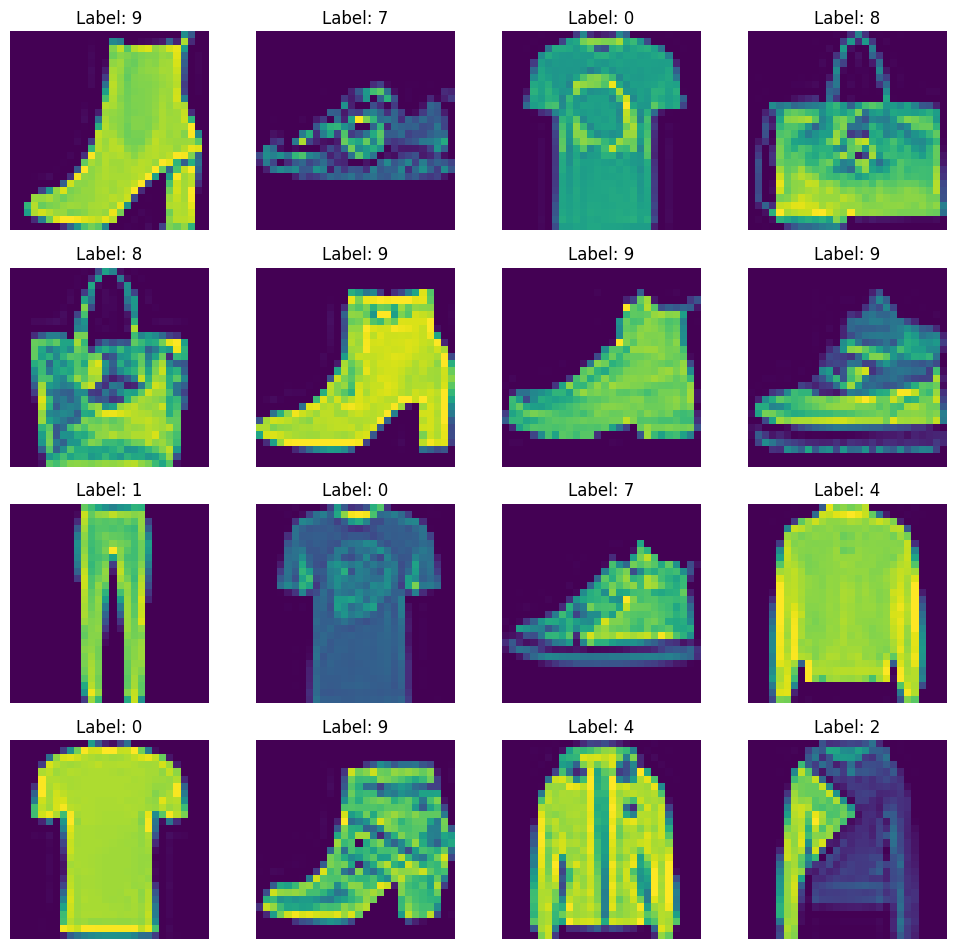

In [5]:
# create 4*4 grid of images
fig,axes = plt.subplots(4,4,figsize=(10,10))

#plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i,1:].values.reshape(28,28)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Label: {df.iloc[i,0]}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [6]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [9]:
# train test split 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# scaling the features
x_train = x_train/255.0
x_test = x_test/255.0

In [11]:
# create custom dataset class
class CustomDataset(Dataset):
    def __init__(self,features,labels):
        self.features = torch.tensor(features,dtype=torch.float32)
        self.labels = torch.tensor(labels,dtype=torch.long)
    
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx],self.labels[idx]
        
        

In [12]:
train_dataset = CustomDataset(x_train,y_train)
test_dataset = CustomDataset(x_test,y_test)
print(len(train_dataset))


4800


In [13]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [14]:
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=32,shuffle=False)

In [15]:
# define nn
class myNet(nn.Module):
    def __init__(self,num_features):
        super().__init__()
        self.num_features = num_features
        self.model = nn.Sequential(
            nn.Linear(num_features,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10),
            
        )
    def forward(self,x):
        return self.model(x)

In [16]:
# set learning rate and epochs
epochs = 100
learning_rate = 0.1

In [17]:
# create model
model = myNet(x_train.shape[1])

# loss function
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(),lr=learning_rate)

In [18]:
# training loop
for epoch in range(epochs):
    
    total_epoch_loss = 0
    for batch_features , batch_labels in train_loader:
        # forward pass
        outputs = model(batch_features)
        
        # calculate loss
        loss = criterion(outputs,batch_labels)
        
        # backprop
        optimizer.zero_grad()
        loss.backward()
        
        # update parameters
        optimizer.step()
        
        total_epoch_loss += loss.item()
    
    avg_loss = total_epoch_loss / len(train_loader)
    print(f'Epoch {epoch+1}, Loss: {avg_loss}')
    

Epoch 1, Loss: 1.3216368583838145
Epoch 2, Loss: 0.7793365317583084
Epoch 3, Loss: 0.6427524542808533
Epoch 4, Loss: 0.5751657458146413
Epoch 5, Loss: 0.5278772719701131
Epoch 6, Loss: 0.49531099418799085
Epoch 7, Loss: 0.4619268523653348
Epoch 8, Loss: 0.43578990375002224
Epoch 9, Loss: 0.41821308076381686
Epoch 10, Loss: 0.39949775497118634
Epoch 11, Loss: 0.38570138782262803
Epoch 12, Loss: 0.3719716985026995
Epoch 13, Loss: 0.3493794798851013
Epoch 14, Loss: 0.3455629136164983
Epoch 15, Loss: 0.31592130129535995
Epoch 16, Loss: 0.3110544161498547
Epoch 17, Loss: 0.2934306888779004
Epoch 18, Loss: 0.2854089424510797
Epoch 19, Loss: 0.2734348543733358
Epoch 20, Loss: 0.2617666217436393
Epoch 21, Loss: 0.26644358336925505
Epoch 22, Loss: 0.24347751920421917
Epoch 23, Loss: 0.23926382559041182
Epoch 24, Loss: 0.225456866795818
Epoch 25, Loss: 0.22396456686158975
Epoch 26, Loss: 0.21319957663615544
Epoch 27, Loss: 0.21745977687338988
Epoch 28, Loss: 0.20949112041542928
Epoch 29, Loss: 0

In [19]:
# set model to eval mode
model.eval()

myNet(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [26]:
# evaluation 
total = 0
correct = 0
with torch.no_grad():
    for batch_features , batch_labels in test_loader:
        outputs = model(batch_features)
        _,predicted = torch.max(outputs,1)
        total += batch_labels.shape[0]
        correct += (predicted==batch_labels).sum().item()
        
print(correct/total)

0.7966666666666666
